# Why solve this project?
After completing this project you will have better understanding of how to apply linear model using GridsearchCV.

* Chi square contengency test
* Box plot
* Linear regression
* GridsearchCV
* Ridge and Lasso Regressor

In [17]:
#Task 1 - Load dataset and check summary statistics
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv(r"C:\Users\tdhoble\Downloads\Mutual Fund Returns.csv")
print(data.shape)
print(data.describe())

data.drop('Serial Number', axis=1, inplace=True)

In [2]:
#Importing header files
from scipy.stats import chi2_contingency
import scipy.stats as stats

#Critical value 
critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 11)   # Df = number of variable categories(in purpose) - 1

return_rating = data['morningstar_return_rating'].value_counts()
risk_rating = data['morningstar_risk_rating'].value_counts()
observed = pd.concat([return_rating.transpose(), risk_rating.transpose()], axis=1, keys=['return','risk'])

print(return_rating)
print(risk_rating)
print(observed)

3    3892
4    2628
2    2422
0    1236
5     956
1     764
Name: morningstar_return_rating, dtype: int64
3    3845
4    2614
2    2218
0    1236
5    1080
1     905
Name: morningstar_risk_rating, dtype: int64
   return  risk
3    3892  3845
4    2628  2614
2    2422  2218
0    1236  1236
5     956  1080
1     764   905


In [3]:
chi2, p, dof, ex = chi2_contingency(observed)
print("chi2: {},\n p: {},\n dof: {},\n ex: {}".format(chi2, p, dof, ex))
print("critical_value: {}".format(critical_value))

chi2: 28.75585318206671,
 p: 2.5889934498733718e-05,
 dof: 5,
 ex: [[3868.5 3868.5]
 [2621.  2621. ]
 [2320.  2320. ]
 [1236.  1236. ]
 [1018.  1018. ]
 [ 834.5  834.5]]
critical_value: 19.67513757268249


In [4]:
if chi2 > critical_value:
    print("Null Hypothesis can not be rejected")
else:
    print("Rejecting Null hypothesis")

Null Hypothesis can not be rejected


In [5]:
# check the correlation
data.corr()
correlation = data.corr().abs()
correlation.head()

,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,sectors_basic_materials,...,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
total_net_assets,1.000000,0.057418,0.147142,0.029626,0.047519,0.031818,0.032194,0.004189,0.013875,0.001509,...,0.001583,0.003768,0.032656,0.005921,0.020474,0.001892,0.054020,0.059254,0.002057,0.043320
net_annual_expenses_ratio,0.057418,1.000000,0.108437,0.101058,0.154936,0.203864,0.016482,0.045152,0.033294,0.059771,...,0.008594,0.015585,0.003425,0.006987,0.035547,0.049051,0.130365,0.128853,0.018996,0.236534
morningstar_rating,0.147142,0.108437,1.000000,0.077220,0.007753,0.040544,0.080241,0.005420,0.020478,0.002311,...,0.000206,0.032024,0.006325,0.002707,0.014802,0.028804,0.069063,0.087448,0.008971,0.032368
portfolio_cash,0.029626,0.101058,0.077220,1.000000,0.305599,0.005976,0.088990,0.017304,0.009242,0.038516,...,0.018653,0.077419,0.045813,0.089837,0.057446,0.016696,0.024123,0.096201,0.068273,0.060556
portfolio_stocks,0.047519,0.154936,0.007753,0.305599,1.000000,0.917733,0.148690,0.088568,0.121941,0.193195,...,0.039240,0.016183,0.023244,0.148121,0.158772,0.066462,0.067463,0.271101,0.192980,0.384677


In [6]:
# unstack and sort the values
us_correlation = correlation.unstack()
us_correlation = us_correlation.sort_values(ascending=False)
us_correlation.head()

bonds_aaa    bonds_aaa      1.0
category_55  category_55    1.0
category_57  category_57    1.0
category_58  category_58    1.0
category_59  category_59    1.0
dtype: float64

In [7]:
# max correlated features between 0.75 to 1
max_correlated = us_correlation[(us_correlation>0.75) & (us_correlation<1)]
max_correlated

morningstar_return_rating  morningstar_rating           0.963584
morningstar_rating         morningstar_return_rating    0.963584
portfolio_bonds            portfolio_stocks             0.917733
portfolio_stocks           portfolio_bonds              0.917733
category_12                portfolio_convertable        0.892575
portfolio_convertable      category_12                  0.892575
sharpe_ratio_3y            mean_annual_return_3y        0.769218
mean_annual_return_3y      sharpe_ratio_3y              0.769218
dtype: float64

In [8]:
data.drop(columns=['morningstar_rating','portfolio_stocks','category_12','sharpe_ratio_3y'],inplace=True)

[Text(0.5, 1.0, 'net_annual_expenses_ratio')]

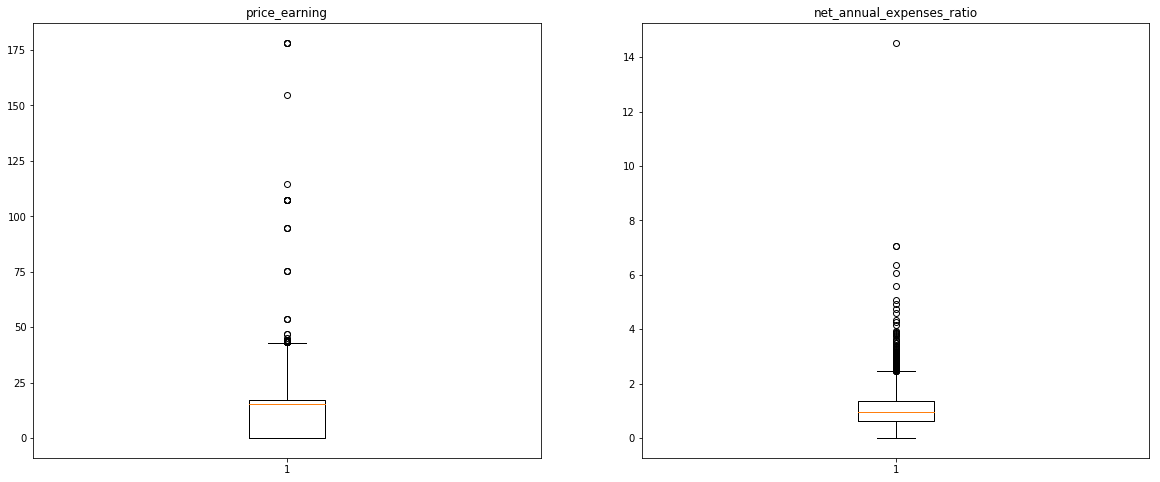

In [9]:
#Setting up the subplots
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(20,8))

#Plotting box plot
ax_1.boxplot(data['price_earning'])

#Setting the subplot axis title
ax_1.set(title='price_earning')

#Plotting box plot
ax_2.boxplot(data['net_annual_expenses_ratio'])

#Setting the subplot axis title
ax_2.set(title='net_annual_expenses_ratio')

In [12]:
X = data.drop('bonds_aaa', axis=1)
y = data['bonds_aaa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse: {}".format(rmse))

rmse: 15.729889665418414


In [18]:
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

ridge_model = Ridge()
ridge_grid = GridSearchCV(estimator=ridge_model, param_grid=dict(alpha=ridge_lambdas))
ridge_grid.fit(X_train, y_train)
y_pred = ridge_grid.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("ridge_rmse: {}".format(ridge_rmse))

ridge_rmse: 15.720131026226944


In [20]:
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

lasso_model = Lasso()
lasso_grid = GridSearchCV(estimator=lasso_model, param_grid=dict(alpha=lasso_lambdas))
lasso_grid.fit(X_train, y_train)
y_pred = lasso_grid.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("lasso_rmse: {}".format(lasso_rmse))

lasso_rmse: 15.719153628852961
